In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")

In [0]:
imdb =imdb.drop_duplicates()

In [0]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [0]:
#Color == 1 / Black and White == 0
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"] == "Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    4772
0     207
Name: color_0_ou_1, dtype: int64

In [0]:
#Media das notas por cor 
color_or_bw.groupby("color")["imdb_score"].mean()

color
 Black and White    7.220290
Color               6.408738
Name: imdb_score, dtype: float64

**DESAFIO 1 :**

Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos

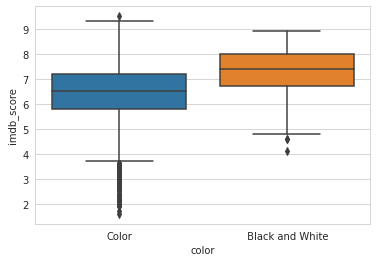

In [0]:
sns.set_style("whitegrid")
sns.boxplot(data=color_or_bw, x="color", y="imdb_score")

Uso de apenas filmes americanos, para uma melhor análise.

In [0]:
#Uso de apenas os filmes americanos
imdb_usa = imdb.query("country == 'USA'")
imdb_usa["lucro"] = imdb_usa["gross"] - imdb_usa["budget"]

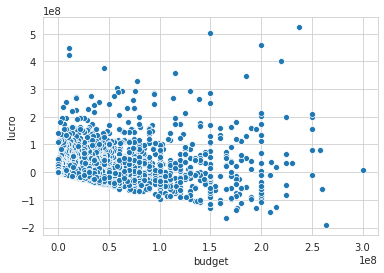

In [0]:
#Gráfico (Gasto x Lucro)
sns.scatterplot(data=imdb_usa.query("gross > 0 | budget > 0").dropna(), x="budget", y="lucro")

**DESAFIO 2 :**

No gráfico de **gasto por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5)

In [0]:
movie_less_profit = imdb_usa[["movie_title", "title_year", "budget", "lucro"]].sort_values("lucro", ascending=True).head(1)
movie_less_profit

,movie_title,title_year,budget,lucro
5,John Carter,2012.0,263700000.0,-190641321.0


O filme com um grande orçamento e um enorme prejuízo é "John Carter".

Seu ano de lançamento é 2012, e como os dados tem o último ano como 2016, infere-se que neste caso específico o grande déficit não está relacionado com a falta de tempo para estabelecimento dos dados.

**DESAFIO 3 :**

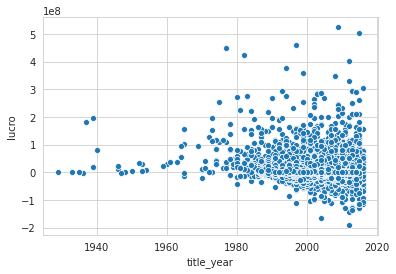

In [0]:
#Gráfico (Ano x Lucro)
sns.scatterplot(data=imdb_usa.query("gross > 0 | budget > 0").dropna(), x="title_year", y="lucro")

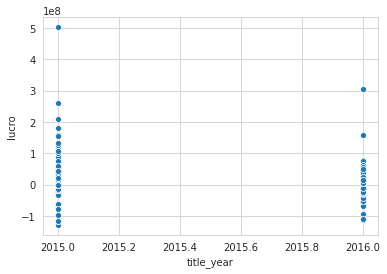

In [0]:
sns.scatterplot(data=imdb_usa.query("title_year >= 2015"), x="title_year", y="lucro")

**DESAFIO 4 :**

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

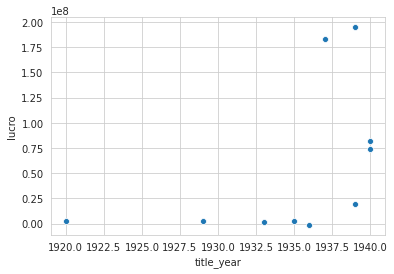

In [0]:
#Gráfico dos filmes pré 2ª Guerra (Ano x Lucro)
sns.scatterplot(data=imdb_usa.query("title_year <= 1940"), x="title_year", y="lucro")

Estes são os 2 filmes com grande lucro pré 2ª Guerra Mundial.



In [0]:
imdb_usa.query("title_year <= 1940").sort_values("lucro", ascending=False).head(2)[["movie_title", "title_year", "lucro"]]

,movie_title,title_year,lucro
3970,Gone with the Wind,1939.0,194678278.0
4449,Snow White and the Seven Dwarfs,1937.0,182925485.0


**DESAFIO 5 :**

No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen.

In [0]:
movies_director = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(movies_director, on="director_name")
gross_director = gross_director.rename(columns={"director_name":"movies_by_director"})
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,gross,movies_by_director
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


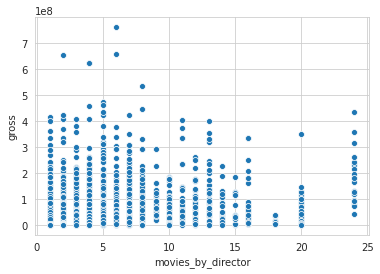

In [0]:
#Gráfico (filmes_irmãos x dindin)
sns.scatterplot(data=gross_director, x="movies_by_director", y="gross")

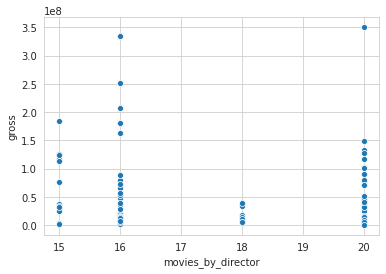

In [0]:
#Ajustando o Gráfico para encontrar o valor exato de "movies_by_director" a ser analisado.
sns.scatterplot(data=gross_director.query("20 >= movies_by_director >= 15"), x="movies_by_director", y="gross")

In [0]:
gross_director.query("movies_by_director == 18")

,director_name,gross,movies_by_director
1549,Woody Allen,7496522.0,18.0
1748,Woody Allen,16684352.0,18.0
1873,Woody Allen,13383737.0,18.0
1881,Woody Allen,10569071.0,18.0
1884,Woody Allen,9714482.0,18.0
1973,Woody Allen,33404871.0,18.0
1988,Woody Allen,17071230.0,18.0
2006,Woody Allen,3203044.0,18.0
2085,Woody Allen,14792779.0,18.0
2094,Woody Allen,4839383.0,18.0


De acordo com a análise fica claro que os pontos estranhos entre 15 e 20 no gráfico indicam os filmes do diretor Woody Allen.

Confirmando a tese do Paulo.

**DESAFIO 6 :**

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

In [0]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.646158,0.799260,0.036865
budget,0.646158,1.000000,0.057774,0.232640
lucro,0.799260,0.057774,1.000000,-0.122092
title_year,0.036865,0.232640,-0.122092,1.000000


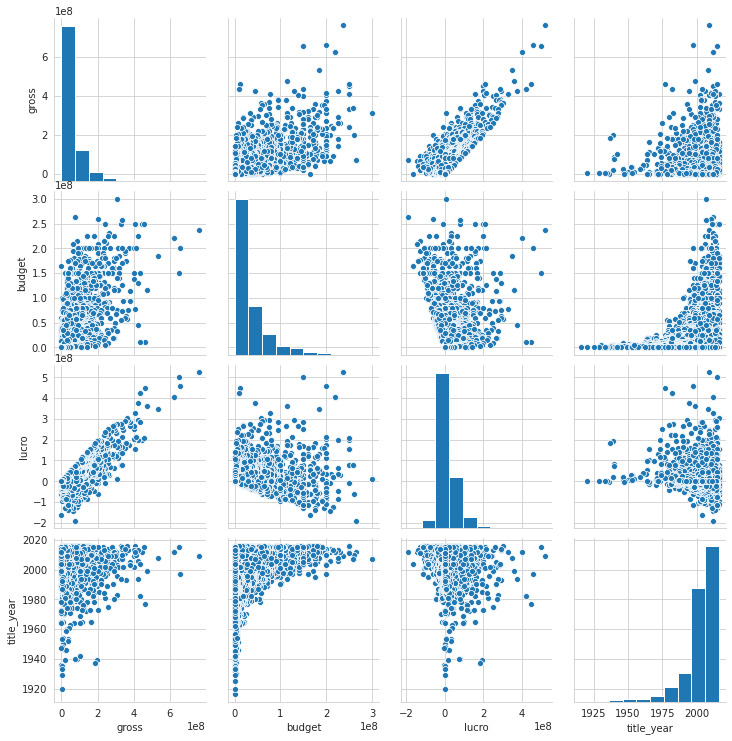

In [0]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

Identificação dos gráficos como uma matiz: [linha, coluna]

Análise:

[0, 1] => Visto um aumento no budget, há uma leve/pequena tendência em um aumento no gross.

[0,3] => Com o passar dos anos, diversos fatores demontram um grande aumento no gross.

[1, 4] => Com o passar dos anos, assim como o gross o budget  aumentou mas de modo repentino.

[2, 0] => Aparenta-se um aumento dos lucros em união ao aumento do gross.

[2, 1] => Enquanto o lucro parece aumentar junto ao gross, o lucro junto ao budget sofre uma maior variação e apresenta uma concentração em lucros baixos/médios e negativos.

[2, 3] => O lucro em relação ao ano demostra grande variação, sem muita precisão.




**DESAFIO 7 :**

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [0]:
movies_pos_2000 = imdb_usa.query("title_year >= 2000")
movies_pos_2000[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.708050,0.774906,0.108058
budget,0.708050,1.000000,0.102324,0.065052
lucro,0.774906,0.102324,1.000000,0.034094
title_year,0.108058,0.065052,0.034094,1.000000


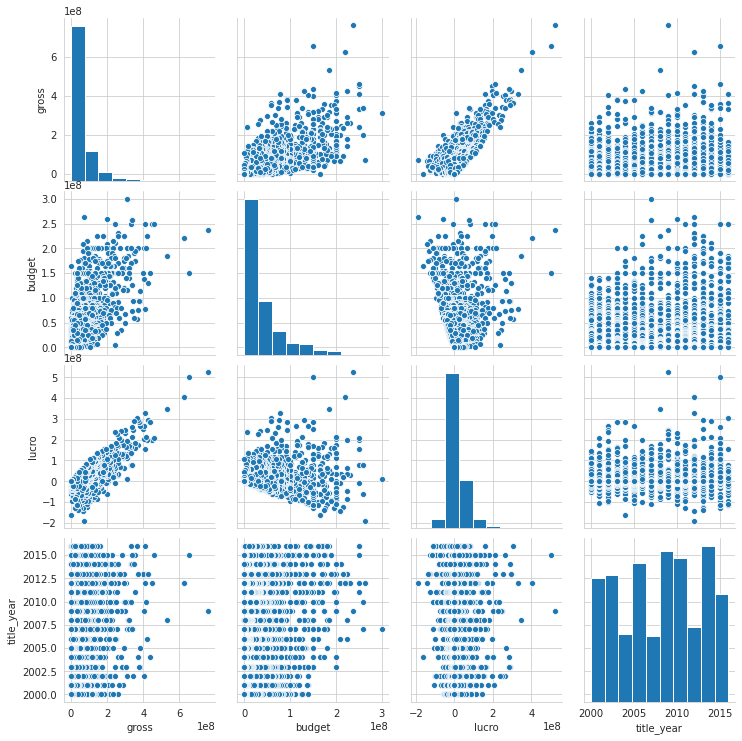

In [0]:
sns.pairplot(data=movies_pos_2000[["gross", "budget", "lucro", "title_year"]])

**DESAFIO 8 :**

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

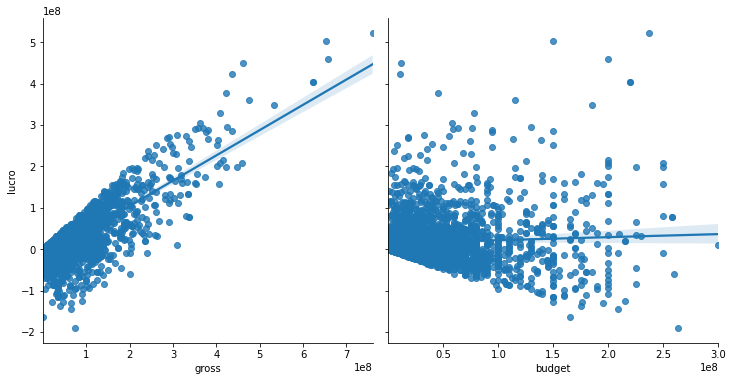

In [0]:
sns.pairplot(data=imdb_usa, x_vars=["gross", "budget"], y_vars="lucro", kind="reg", height=5)

**DESAFIO 9 :**

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa).

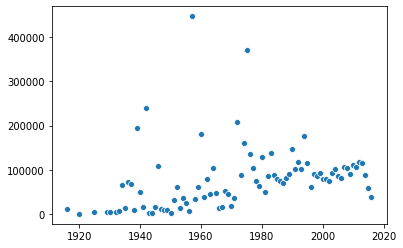

In [5]:
#Gráfico (Ano x Quantidade de votos)
rate_year = imdb_usa.groupby("title_year")["num_voted_users"].mean()
sns.scatterplot(data=rate_year)

In [6]:
imdb_usa_with_rate_year = imdb_usa.join(rate_year, on="title_year", rsuffix="rs")
imdb_usa_with_rate_year = imdb_usa_with_rate_year.rename(columns={"num_voted_usersrs":"votes_per_year"})
imdb_usa_with_rate_year.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro,votes_per_year
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,90459.213115
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,105898.240000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,116836.911765
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,116836.911765
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0,105898.240000


In [0]:
#Analise de Midia entre FacebookLikes e IMdB Score.
imdb_usa[["actor_1_facebook_likes", "movie_facebook_likes" , "imdb_score"]].corr()

,actor_1_facebook_likes,movie_facebook_likes,imdb_score
actor_1_facebook_likes,1.000000,0.124172,0.095867
movie_facebook_likes,0.124172,1.000000,0.259630
imdb_score,0.095867,0.259630,1.000000


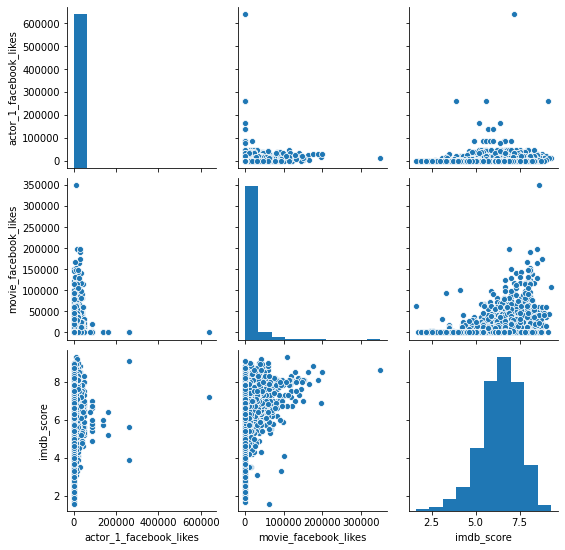

In [7]:
sns.pairplot(data=imdb_usa[["actor_1_facebook_likes", "movie_facebook_likes" , "imdb_score"]])